# Machine Learning K Means

## Contents:

### 1. Importing libraries and data
### 2. Preprocessing
### 3. Elbow technique
### 4. K-Means Clustering

### 1.0 Importing libraries and data and renaming columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
import warnings 

# Disable deprecation warnings 
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
# Define path
path = r'C:\Users\Owner\Documents\Career Foundry\Gun Violence'

In [5]:
# Import data
df_import = pd.read_csv(os.path.join(path, '02 Data', '02 02 Prepared Data', 'gun_violence_final.csv'))

In [6]:
df_import.shape

(239677, 27)

In [53]:
df_import.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'incident_id', 'date', 'state',
       'city_or_county', 'n_killed', 'n_injured', 'congressional_district',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'date_int', 'Gun Usage', 'region'],
      dtype='object')

In [54]:
df_import = df_import.drop('Unnamed: 0.1', axis = 1)

In [55]:
df_import = df_import.drop('Unnamed: 0', axis = 1)

In [56]:
df_import.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,...,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,date_int,Gun Usage,region
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,40.3467,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN,20130101,NaN,Northeast
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,33.9090,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0,20130101,NaN,West
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,41.4455,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0,20130101,Multiple Guns,Midwest
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,39.6518,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0,20130105,NaN,West
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,36.1140,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0,20130107,Multiple Guns,South


### 2.0 Preprocessing

#### 2.1 Create dataframe with only numerical categories

In [8]:
# Determine numerical variables
df_import.dtypes

Unnamed: 0                    int64
incident_id                   int64
date                         object
state                        object
city_or_county               object
n_killed                      int64
n_injured                     int64
congressional_district      float64
incident_characteristics     object
latitude                    float64
longitude                   float64
n_guns_involved             float64
participant_age              object
participant_age_group        object
participant_gender           object
participant_status           object
participant_type             object
state_house_district        float64
state_senate_district       float64
date_int                      int64
Gun Usage                    object
region                       object
year                          int64
month                         int64
unemployment_date            object
FR_date                      object
unemployment_rate           float64
dtype: object

In [9]:
#Create datafram of numerical values
df_num = df_import[['incident_id', 'month', 'n_killed', 'n_injured', 'latitude', 'longitude', 'unemployment_rate']]

In [10]:
df_num.head()

,incident_id,month,n_killed,n_injured,latitude,longitude,unemployment_rate
0,461105,1,0,4,40.3467,40.3467,5.516897
1,460726,1,1,3,33.9090,33.9090,5.516897
2,478855,1,1,3,41.4455,41.4455,5.516897
3,478925,1,4,0,39.6518,39.6518,5.516897
4,478959,1,2,2,36.1140,36.1140,5.516897


#### 2.2 Standardize Data

In [67]:
# Import scaler from sklearn
from sklearn.preprocessing import StandardScaler

In [68]:
# Create StandardScaler object called scaler
scaler = StandardScaler()

In [69]:
# Fit scaler to dataframe
scaler.fit(df_num)

StandardScaler()

In [70]:
# Transform dataframe to a scaled version
scaled_df = scaler.transform(df_num)

In [72]:
# Assign new dataframe scaled values
df_new = pd.DataFrame(scaled_df, columns=df_num.columns)

In [74]:
df_new.head()

,incident_id,date_int,n_killed,n_injured,latitude,longitude
0,-0.335107,-2.266596,-0.483519,4.803055,0.554999,0.300977
1,-0.336400,-2.266596,1.433006,3.433099,-0.720997,0.023961
2,-0.274554,-2.266596,1.433006,3.433099,0.772789,0.348259
3,-0.274315,-2.266269,7.182580,-0.676767,0.417265,0.271075
4,-0.274199,-2.266105,3.349530,2.063144,-0.283951,0.118843


### 3.0 The elbow technique

In [11]:
# Define the range of potential clusters in the data
num_cl = range(1, 15) 

# Define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

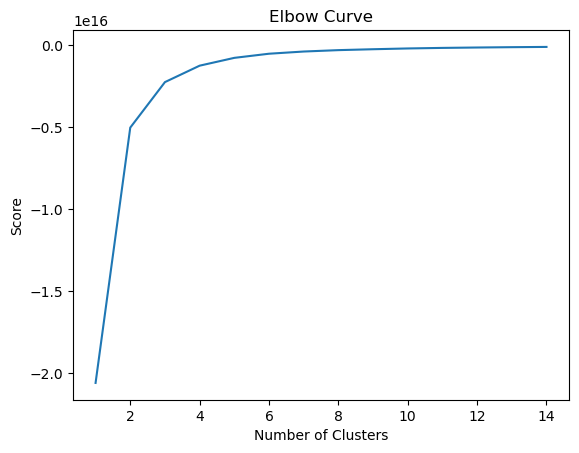

In [13]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve of the elbow curve starts at two and continues until eight when the line starts to flatten out.  The curve starts to flatten at four, therefore that is the best number of clusters to use.

### 4.0 K-Means Clustering

#### 4.1 Create clusters

In [29]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4)

In [30]:
# Fit the k-means object to the data
kmeans.fit(df_num)

KMeans(n_clusters=4)

In [31]:
#Add column for which cluster each observations belongs to 
df_num['clusters'] = kmeans.fit_predict(df_num)

In [32]:
# Verify 'clusters' column was appended
df_num.head()

,incident_id,month,n_killed,n_injured,latitude,longitude,unemployment_rate,clusters
0,461105,1,0,4,40.3467,40.3467,5.516897,3
1,460726,1,1,3,33.9090,33.9090,5.516897,3
2,478855,1,1,3,41.4455,41.4455,5.516897,3
3,478925,1,4,0,39.6518,39.6518,5.516897,3
4,478959,1,2,2,36.1140,36.1140,5.516897,3


In [33]:
# Frequency of each cluster 
df_num['clusters'].value_counts()

3    64696
1    61889
0    57510
2    55582
Name: clusters, dtype: int64

#### 4.2 Use Scatterplots to Visualize Clusters

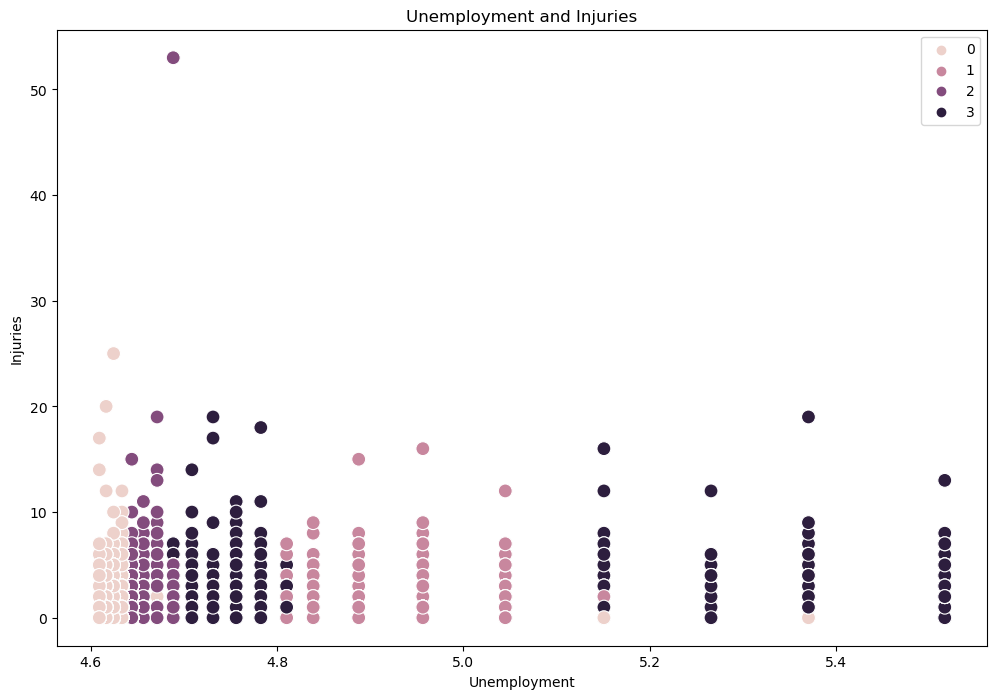

In [35]:
# Plot the clusters for the injuries and longitude
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['unemployment_rate'], y=df_num['n_injured'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Unemployment') # Label x-axis.
plt.ylabel('Injuries') # Label y-axis.
plt.title('Unemployment and Injuries')
plt.show()

In [37]:
df_import['cluster'] = df_num['clusters']

In [38]:
df_import.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,...,state_senate_district,date_int,Gun Usage,region,year,month,unemployment_date,FR_date,unemployment_rate,cluster
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,NaN,20130101,NaN,Northeast,2013,1,2013-01-01,2013-01-01,5.516897,3
1,1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,35.0,20130101,NaN,West,2013,1,2013-01-01,2013-01-01,5.516897,3
2,2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,13.0,20130101,Multiple Guns,Midwest,2013,1,2013-01-01,2013-01-01,5.516897,3
3,3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,28.0,20130105,NaN,West,2013,1,2013-01-01,2013-01-01,5.516897,3
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,27.0,20130107,Multiple Guns,South,2013,1,2013-01-01,2013-01-01,5.516897,3


In [40]:
# Export dataframe
# Define path
path = r'C:\Users\Owner\Documents\Career Foundry\Gun Violence'

# Import data
df_import.to_csv(os.path.join(path, '02 Data', '02 02 Prepared Data', 'gun_violence_final_cluster.csv'))